In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

### Загрузка и обработка данных

In [2]:
player_data = pd.read_csv('player_data.csv')

player_data['college'].fillna('No Info', inplace=True)
player_data.dropna(inplace=True)

def height_to_cm(height):
    feet, inches = height.split('-')
    inches = int(feet) * 12 + int(inches)
    return int(inches * 2.54)

def weight_to_kg(weight):
    return int(weight / 2.2)

player_data['height'] = player_data['height'].apply(height_to_cm)
player_data['weight'] = player_data['weight'].apply(weight_to_kg)

player_data['born'] = player_data['birth_date'].str[-4:].astype('int16')
player_data['birth_date'] = pd.to_datetime(player_data['birth_date'])

player_data

name  year_start  year_end position  height  weight  \
0          Alaa Abdelnaby        1991      1995      F-C     208     109   
1         Zaid Abdul-Aziz        1969      1978      C-F     205     106   
2     Kareem Abdul-Jabbar        1970      1989        C     218     102   
3      Mahmoud Abdul-Rauf        1991      2001        G     185      73   
4       Tariq Abdul-Wahad        1998      2003        F     198     101   
...                   ...         ...       ...      ...     ...     ...   
4545           Ante Zizic        2018      2018      F-C     210     113   
4546             Jim Zoet        1983      1983        C     215     109   
4547            Bill Zopf        1971      1971        G     185      77   
4548          Ivica Zubac        2017      2018        C     215     120   
4549           Matt Zunic        1949      1949      G-F     190      88   

     birth_date                                college  born  
0    1968-06-24                        Duke University  1968  
1    1946-04-07                  Iowa State University  1946  
2    1947-04-16  University of California, Los Angeles  1947  
3    1969-03-09             Louisiana State University  1969  
4    1974-11-03              San Jose State University  1974  
...         ...                                    ...   ...  
4545 1997-01-04                                No Info  1997  
4546 1953-12-20                  Kent State University  1953  
4547 1948-06-07                    Duquesne University  1948  
4548 1997-03-18                                No Info  1997  
4549 1919-12-19           George Washington University  1919  

[4514 rows x 9 columns]

In [3]:
players = pd.read_csv('Players.csv')

players.drop(columns=['Unnamed: 0', 'height', 'weight', 'collage'], inplace=True)
players.rename(columns={'Player': 'name'}, inplace=True)
players.dropna(inplace=True)

players['born'] = players['born'].astype('int16')
players

name  born      birth_city             birth_state
1          Cliff Barker  1921        Yorktown                 Indiana
4           Ralph Beard  1927     Hardinsburg                Kentucky
6         Charlie Black  1921            Arco                   Idaho
7           Nelson Bobb  1924    Philadelphia            Pennsylvania
8       Jake Bornheimer  1927   New Brunswick              New Jersey
...                 ...   ...             ...                     ...
3917      Troy Williams  1969        Columbia          South Carolina
3918       Kyle Wiltjer  1992        Portland                  Oregon
3919  Stephen Zimmerman  1996  Hendersonville               Tennessee
3920        Paul Zipser  1994      Heidelberg                 Germany
3921        Ivica Zubac  1997          Mostar  Bosnia and Herzegovina

[3439 rows x 4 columns]

In [4]:
join_cols = ['name', 'born']
players = pd.merge(players, player_data, on=join_cols)
players.drop(columns=['born', 'position'], inplace=True)
players

name      birth_city             birth_state  year_start  \
0          Cliff Barker        Yorktown                 Indiana        1950   
1           Ralph Beard     Hardinsburg                Kentucky        1950   
2         Charlie Black            Arco                   Idaho        1949   
3           Nelson Bobb    Philadelphia            Pennsylvania        1950   
4       Jake Bornheimer   New Brunswick              New Jersey        1949   
...                 ...             ...                     ...         ...   
3138   Isaiah Whitehead        Brooklyn                New York        2017   
3139       Kyle Wiltjer        Portland                  Oregon        2017   
3140  Stephen Zimmerman  Hendersonville               Tennessee        2017   
3141        Paul Zipser      Heidelberg                 Germany        2017   
3142        Ivica Zubac          Mostar  Bosnia and Herzegovina        2017   

      year_end  height  weight birth_date                          college  
0         1952     187      84 1921-01-15           University of Kentucky  
1         1951     177      79 1927-12-02           University of Kentucky  
2         1952     195      90 1921-06-15             University of Kansas  
3         1953     182      77 1924-02-25                Temple University  
4         1950     195      90 1927-06-29               Muhlenberg College  
...        ...     ...     ...        ...                              ...  
3138      2018     193      96 1995-03-08            Seton Hall University  
3139      2017     208     109 1992-10-20               Gonzaga University  
3140      2017     213     109 1996-09-09  University of Nevada, Las Vegas  
3141      2018     203      97 1994-02-18                          No Info  
3142      2018     215     120 1997-03-18                          No Info  

[3143 rows x 9 columns]

In [5]:
stats = pd.read_csv('Seasons_Stats.csv')

stats.drop(columns=['Unnamed: 0', 'blanl', 'blank2'], inplace=True)
stats.dropna(inplace=True)
stats.drop(index=stats[stats['Player'].str.endswith('*')].index.values.tolist(), inplace=True)

int_cols = ['Year', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA',
           'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'];
stats[int_cols] = stats[int_cols].astype('int16')

stats.rename(columns={'Year': 'Season',
                      'Player': 'name',
                      'Pos': 'Position',
                      'Tm': 'Team',
                      'G': 'Games',
                      'GS': 'Games Started',
                      'MP': 'Minutes Played',
                      'PER': 'Player Efficiency Rating',
                      'TS%': 'True Shooting %',
                      '3PAr': '3-Point Attempt Rate',
                      'FTr': 'Free Throw Rate',
                      'ORB%': 'Offensive Rebound Percentage',
                      'DRB%': 'Defensive Rebound Percentage',
                      'TRB%': 'Total Rebound Percentage',
                      'AST%': 'Assist Percentage',
                      'STL%': 'Steal Percentage',
                      'BLK%': 'Block Percentage',
                      'TOV%': 'Turnover Percentage',
                      'USG%': 'Usage Percentage',
                      'OWS': 'Offensive Win Shares',
                      'DWS': 'Defensive Win Shares',
                      'WS': 'Win Shares',
                      'WS/48': 'Win Shares Per 48 Minutes',
                      'OBPM': 'Offensive Box Plus/Minus',
                      'DBPM': 'Defensive Box Plus/Minus',
                      'BPM': 'Box Plus/Minus',
                      'VORP': 'Value Over Replacement',
                      'FG': 'Field Goals',
                      'FGA': 'Field Goal Attempts',
                      'FG%': 'Field Goal Percentage',
                      '3P': '3-Point Field Goals',
                      '3PA': '3-Point Field Goal Attempts',
                      '3P%': '3-Point Field Goal Percentage',
                      '2P': '2-Point Field Goals',
                      '2PA': '2-Point Field Goal Attempts',
                      '2P%': '2-Point Field Goal Percentage',
                      'eFG%': 'Effective Field Goal Percentage',
                      'FT': 'Free Throws',
                      'FTA': 'Free Throw Attempts',
                      'FT%': 'Free Throw Percentage',
                      'ORB': 'Offensive Rebounds',
                      'DRB': 'Defensive Rebounds',
                      'TRB': 'Total Rebounds',
                      'AST': 'Assists',
                      'STL': 'Steals',
                      'BLK': 'Blocks',
                      'TOV': 'Turnovers',
                      'PF': 'Personal Fouls',
                      'PTS': 'Points',
                     }, inplace=True)

stats

Season              name Position  Age Team  Games  Games Started  \
5781     1980         M.L. Carr       SF   29  BOS     82              7   
5786     1980        Don Chaney       SG   33  BOS     60              0   
5835     1980        Chris Ford       SG   31  BOS     73             73   
5867     1980  Gerald Henderson       PG   24  BOS     76              2   
5901     1980      Jeff Judkins       SF   23  BOS     65              0   
...       ...               ...      ...  ...  ...    ...            ...   
24685    2017    Thaddeus Young       PF   28  IND     74             74   
24686    2017       Cody Zeller       PF   24  CHO     62             58   
24687    2017      Tyler Zeller        C   27  BOS     51              5   
24689    2017       Paul Zipser       SF   22  CHI     44             18   
24690    2017       Ivica Zubac        C   19  LAL     38             11   

       Minutes Played  Player Efficiency Rating  True Shooting %  ...  \
5781             1994                      14.6            0.526  ...   
5786              523                       7.8            0.402  ...   
5835             2115                      13.0            0.537  ...   
5867             1061                      12.7            0.539  ...   
5901              674                      14.1            0.567  ...   
...               ...                       ...              ...  ...   
24685            2237                      14.9            0.562  ...   
24686            1725                      16.7            0.604  ...   
24687             525                      13.0            0.508  ...   
24689             843                       6.9            0.503  ...   
24690             609                      17.0            0.547  ...   

       Free Throw Percentage  Offensive Rebounds  Defensive Rebounds  \
5781                   0.739                 106                 224   
5786                   0.762                  31                  42   
5835                   0.754                  77                 104   
5867                   0.690                  37                  46   
5901                   0.816                  32                  34   
...                      ...                 ...                 ...   
24685                  0.523                 131                 318   
24686                  0.679                 135                 270   
24687                  0.564                  43                  81   
24689                  0.775                  15                 110   
24690                  0.653                  41                 118   

       Total Rebounds  Assists  Steals  Blocks  Turnovers  Personal Fouls  \
5781              330      156     120      36        143             214   
5786               73       38      31      11         33              80   
5835              181      215     111      27        105             178   
5867               83      147      45      15        109              96   
5901               66       47      29       5         49              91   
...               ...      ...     ...     ...        ...             ...   
24685             449      122     114      30         96             135   
24686             405       99      62      58         65             189   
24687             124       42       7      21         20              61   
24689             125       36      15      16         40              78   
24690             159       30      14      33         30              66   

       Points  
5781      914  
5786      167  
5835      816  
5867      473  
5901      351  
...       ...  
24685     814  
24686     639  
24687     178  
24689     240  
24690     284  

[14072 rows x 50 columns]

In [6]:
nba_data = pd.merge(stats, players, on=['name'], how='left').dropna()
int_cols = ['year_start', 'year_end', 'height', 'weight']
nba_data[int_cols] = nba_data[int_cols].astype('int16')
nba_data

Season              name Position  Age Team  Games  Games Started  \
1        1980        Don Chaney       SG   33  BOS     60              0   
2        1980        Chris Ford       SG   31  BOS     73             73   
3        1980  Gerald Henderson       PG   24  BOS     76              2   
4        1980      Jeff Judkins       SF   23  BOS     65              0   
5        1980        Rick Robey        C   24  BOS     82             27   
...       ...               ...      ...  ...  ...    ...            ...   
14067    2017    Thaddeus Young       PF   28  IND     74             74   
14068    2017       Cody Zeller       PF   24  CHO     62             58   
14069    2017      Tyler Zeller        C   27  BOS     51              5   
14070    2017       Paul Zipser       SF   22  CHI     44             18   
14071    2017       Ivica Zubac        C   19  LAL     38             11   

       Minutes Played  Player Efficiency Rating  True Shooting %  ...  \
1                 523                       7.8            0.402  ...   
2                2115                      13.0            0.537  ...   
3                1061                      12.7            0.539  ...   
4                 674                      14.1            0.567  ...   
5                1918                      15.4            0.557  ...   
...               ...                       ...              ...  ...   
14067            2237                      14.9            0.562  ...   
14068            1725                      16.7            0.604  ...   
14069             525                      13.0            0.508  ...   
14070             843                       6.9            0.503  ...   
14071             609                      17.0            0.547  ...   

       Personal Fouls  Points      birth_city             birth_state  \
1                  80     167     Baton Rouge               Louisiana   
2                 178     816   Atlantic City              New Jersey   
3                  96     473        Richmond                Virginia   
4                  91     351  Salt Lake City                    Utah   
5                 244     942    Coral Gables                 Florida   
...               ...     ...             ...                     ...   
14067             135     814     New Orleans               Louisiana   
14068             189     639      Washington                 Indiana   
14069              61     178         Visalia              California   
14070              78     240      Heidelberg                 Germany   
14071              66     284          Mostar  Bosnia and Herzegovina   

       year_start  year_end  height  weight  birth_date  \
1            1969      1980     195      95  1946-03-22   
2            1973      1982     195      86  1949-01-11   
3            1980      1992     187      79  1956-01-16   
4            1979      1983     198      84  1956-03-23   
5            1979      1986     210     104  1956-01-30   
...           ...       ...     ...     ...         ...   
14067        2008      2018     203     100  1988-06-21   
14068        2014      2018     213     109  1992-10-05   
14069        2013      2018     213     114  1990-01-17   
14070        2017      2018     203      97  1994-02-18   
14071        2017      2018     215     120  1997-03-18   

                                college  
1                 University of Houston  
2                  Villanova University  
3      Virginia Commonwealth University  
4                    University of Utah  
5                University of Kentucky  
...                                 ...  
14067   Georgia Institute of Technology  
14068                Indiana University  
14069      University of North Carolina  
14070                           No Info  
14071                           No Info  

[12604 rows x 58 columns]

### Визуализация

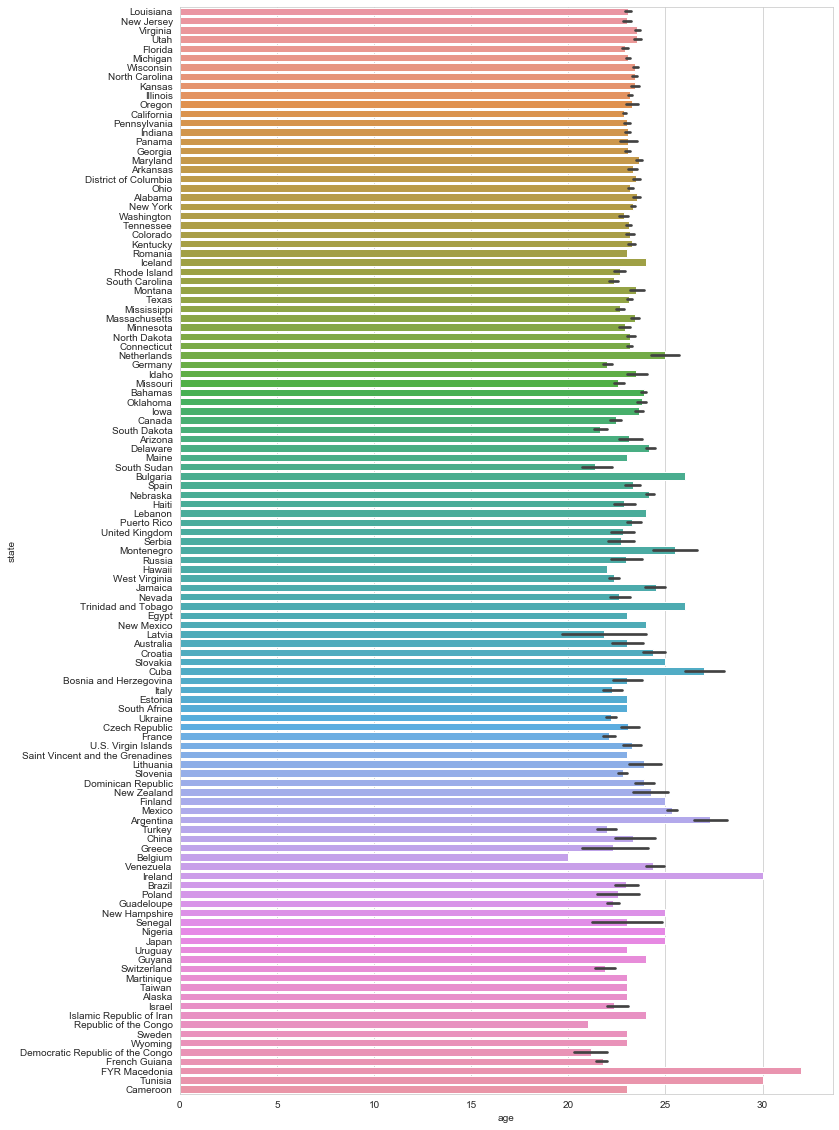

In [44]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 20)

age_df = pd.DataFrame()
age_df['state'] = nba_data['birth_state']
age_df['age'] = nba_data['year_start'] - nba_data['birth_date'].dt.year

sns.barplot(y='state', x='age', data=age_df, ax=ax);

##### Рис. 1 возраст игрока от места рождения
в среднем начинают карьеру в 23. у игроков не из США разброс значений больше

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 11)

exclude_cols = ['Season', 'name', 'Position', 'Team', 'college',
    'birth_city', 'birth_state', 'birth_date', 'year_start', 'year_end']
corr_matrix = nba_data.drop(columns=exclude_cols).corr()
sns.heatmap(corr_matrix, ax=ax);

##### Рис. 2 матрица корелляций
здесь видно что невысокие игроки на подвате, попытки забить трехочковый уменьшают количество голов, а количество отигранных минут их увеличивает. попытки забить полностью кореллируют с забитыми голами, то же с подборами

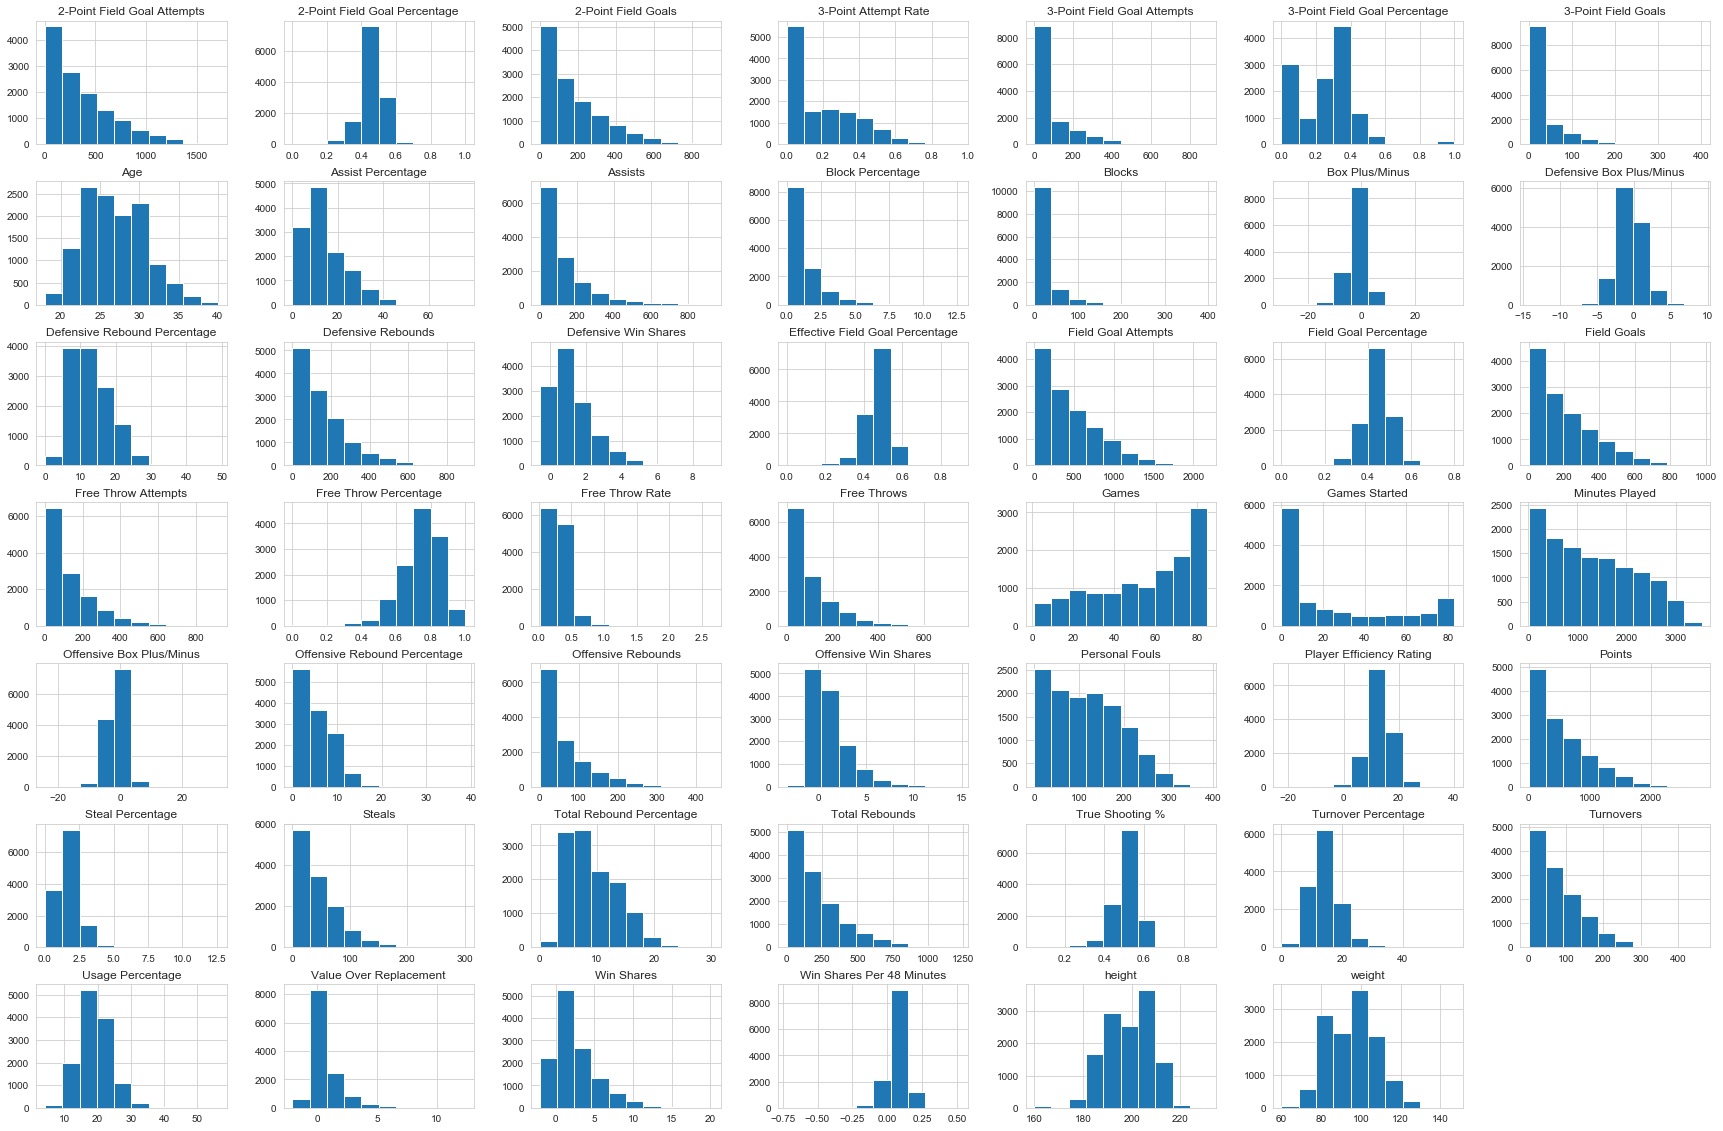

In [51]:
features = list(set(nba_data.columns) - set(exclude_cols))
nba_data[features].hist(figsize=(30,20));

##### Рис. 3 распределения количественных признаков
половина значений это 0. либо игрок не участвовал в матчах, либо об этом нет данных. треть графиков имеет нормальное распределение. так же есть графики с обратной зависимостью


In [52]:
cols = ['height', 'Minutes Played', 'Total Rebound Percentage',
    'Field Goal Percentage', '3-Point Attempt Rate', 'Value Over Replacement']

sns.pairplot(nba_data[cols]);

##### Рис. 4 связи между признаками
можно увидеть связь между процентом голов и заменой игрока, голами и сыгранными минутами, ростом и подборами, ростом и заменой игрока, ростом и атакой, и обратную с защитой

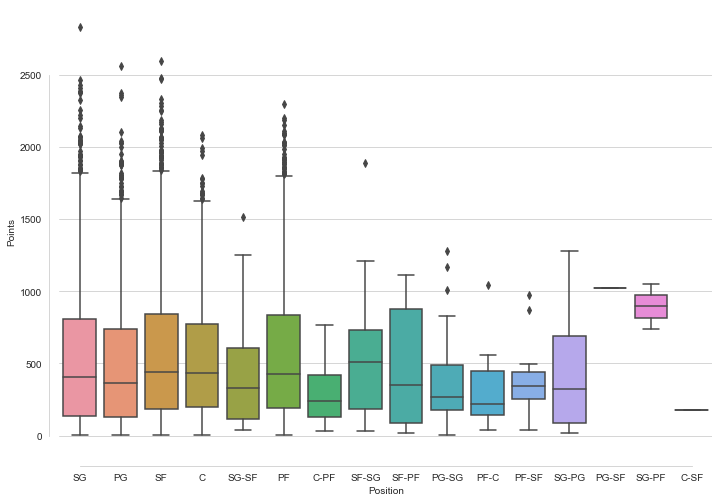

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.boxplot(x="Position", y="Points", data=nba_data, ax=ax)
sns.despine(offset=10, trim=True)

##### Рис. 5 ящики с очками
видно, что 5 классических позиций позволяют набрать примерно одинаковое количество очков, в то время как комбинированные неэффективны. многие легенды баскетбола играли на позиции SG, в ней ожидаемо наибольшее количество выбросов

In [8]:
nba_data.to_csv('nba_data.csv')